In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

%matplotlib inline

### Sources

In [26]:
# List of deaths by day and country
source_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

# List of deaths by day and states for the US
source_deaths_US = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

# List of confirmed cases by day and country
source_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

# List of confirmed cases by day and states for the US
source_confirmed_US = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

# Mapping between contries and continental regions
source_liste_pays_continents = "data/countries.csv"

### Data structures

In [3]:
data_deaths_tmp = pd.read_csv(source_deaths)

print("Shape: {}".format(data_deaths_tmp.shape))
print("Columns: {}".format(list(data_deaths_tmp.columns)))

Shape: (266, 108)
Columns: ['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4

In [4]:
data_deaths_tmp.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,47,50,57,58,60,64,68,72,85,90
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,27,28,28,30,30,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,419,425,432,437,444,450,453,459,463,465
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,40,40,40,41,42,42,43,44,45,45
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


### Mapping countries <-> region
Importing a list of mapping between countries and World Region


In [32]:
liste_pays_continents = pd.read_csv(source_liste_pays_continents,sep=";").drop(columns=["PaysUN"])
liste_pays_continents.head()

,Country/Region,Region
0,Italy,Europe
1,China,China
2,Spain,Europe
3,Iran,Middle East
4,France,Europe


List of Regions

In [31]:
print(list(liste_pays_continents.Region.unique()))

['Europe', 'China', 'Middle East', 'North America', 'Asia', 'South America', 'Africa', 'Oceania', 'Russia']


## Importing and wrangling data

### Global data

In [7]:
# Importing global data
def import_jhu_data(source):
    data = (pd.read_csv(source).drop(columns=["Lat","Long"])
                .merge(liste_pays_continents,how="left")
                .melt(id_vars=["Province/State","Country/Region","Region"], var_name="Date",value_name="nb"))
    data["Date"] = pd.to_datetime(data["Date"])
    return data

# Importing US data
def import_jhu_data_US(source):
    data = (pd.read_csv(source).drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key', 'Population'])
            .rename(columns={"Province_State":"Province/State","Country_Region": "Country/Region"})  
            .merge(liste_pays_continents,how="left")
            .melt(id_vars=["Province/State","Country/Region","Region"], var_name="Date",value_name="nb")
            .groupby(["Province/State","Country/Region","Region","Date"])
            .sum()
            .reset_index()
           )
    data["Date"] = pd.to_datetime(data["Date"])
    return data

In [8]:
data_deaths = import_jhu_data(source_deaths)
data_deaths.head()

,Province/State,Country/Region,Region,Date,nb
0,NaN,Afghanistan,Asie,2020-01-22,0
1,NaN,Albania,Europe,2020-01-22,0
2,NaN,Algeria,Afrique,2020-01-22,0
3,NaN,Andorra,Europe,2020-01-22,0
4,NaN,Angola,Afrique,2020-01-22,0


In [9]:
data_confirmed = import_jhu_data(source_confirmed)
data_confirmed.head()

,Province/State,Country/Region,Region,Date,nb
0,NaN,Afghanistan,Asie,2020-01-22,0
1,NaN,Albania,Europe,2020-01-22,0
2,NaN,Algeria,Afrique,2020-01-22,0
3,NaN,Andorra,Europe,2020-01-22,0
4,NaN,Angola,Afrique,2020-01-22,0


In [10]:
def group_data(data,col, min_threshold=0):
    data = data.groupby([col,"Date"]).sum().reset_index()
    data["max"] = data.groupby(col)["nb"].transform("max")
    data = data[data["max"] > min_threshold]
    return data


def synchronise_J0(data, col, J0_threshold = 1, date_limit = pd.to_datetime('today')):
    data = data[data["nb"] >= J0_threshold]
    data = data[data["Date"] <= date_limit]
    data["jour"] = data.groupby(col)["Date"].rank().astype(int)
    return data

# data_merge3 = synchronise_J0(data_deaths2,"Region",100)
group_data(data_deaths,"Region",1000)

,Region,Date,nb,max
0,Afrique,2020-01-22,0,1359
1,Afrique,2020-01-23,0,1359
2,Afrique,2020-01-24,0,1359
3,Afrique,2020-01-25,0,1359
4,Afrique,2020-01-26,0,1359
...,...,...,...,...
931,South America,2020-04-30,9510,12089
932,South America,2020-05-01,10211,12089
933,South America,2020-05-02,11002,12089
934,South America,2020-05-03,11637,12089


In [54]:
## Groupby Region/Continent
## J0 = 100 deaths

def plot_data(data,col):
    
    grid = sns.relplot('jour', 'nb', data=data, hue=col,kind="line")

    # Adding markers on last day with Col name
    maxima = data.groupby(col).max()
    for index, value in maxima.iterrows():
        grid.axes[0,0].text(value["jour"]+1, value["nb"], index,horizontalalignment='left' )

    grid.set(yscale="log")
    grid._legend.remove()

### Function which is doing the whole process

In [46]:
def sync_and_plot(data, col, J0_threshold = 1, min_threshold = 1, date_limit = pd.to_datetime('today')):
    data = group_data(data,col, min_threshold)
    data_sync = synchronise_J0(data, col, J0_threshold, date_limit)
    plot_data(data_sync,col)

#### Number of confirmed cases by Region

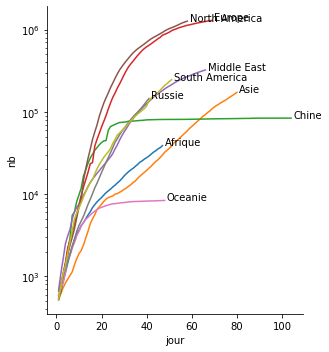

In [55]:
data_confirmed_region = data_confirmed.groupby(["Region","Date"]).sum().reset_index()

fig = sync_and_plot(data_confirmed_region,'Region',500)

#### Number of deaths by Region

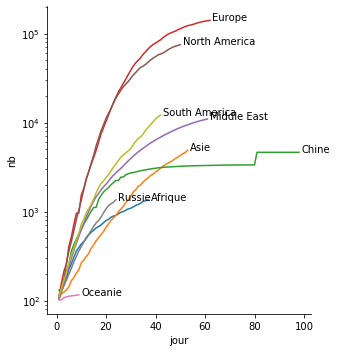

In [14]:
data_deaths_region = data_deaths.groupby(["Region","Date"]).sum().reset_index()

fig = sync_and_plot(data_deaths_region,'Region',100,100)

#### Number of deaths by Country

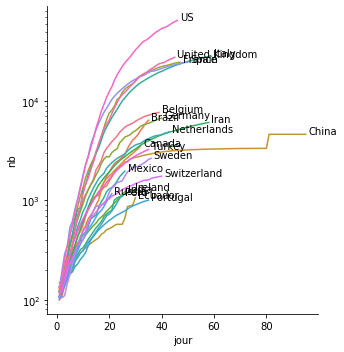

In [15]:
data_deaths_country = data_deaths.groupby(["Country/Region","Date"]).sum().reset_index()
# sync_and_plot(data_deaths_country,'Country/Region',J0_threshold=100, min_threshold=100,date_limit=pd.to_datetime("01/03/2020",format='%d/%m/%Y'))
# sync_and_plot(data_deaths_country,'Country/Region',J0_threshold=100, min_threshold=100,date_limit=pd.to_datetime("15/03/2020",format='%d/%m/%Y'))
# sync_and_plot(data_deaths_country,'Country/Region',J0_threshold=100, min_threshold=100,date_limit=pd.to_datetime("01/04/2020",format='%d/%m/%Y'))
# sync_and_plot(data_deaths_country,'Country/Region',J0_threshold=100, min_threshold=100,date_limit=pd.to_datetime("15/04/2020",format='%d/%m/%Y'))
sync_and_plot(data_deaths_country,'Country/Region',J0_threshold=100, min_threshold=1000,date_limit=pd.to_datetime("01/05/2020",format='%d/%m/%Y'))

### Europe Only

['Albania' 'Andorra' 'Austria' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Holy See'
 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Malta' 'Moldova' 'Monaco' 'Montenegro' 'Netherlands'
 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania' 'San Marino'
 'Serbia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland' 'Ukraine'
 'United Kingdom']


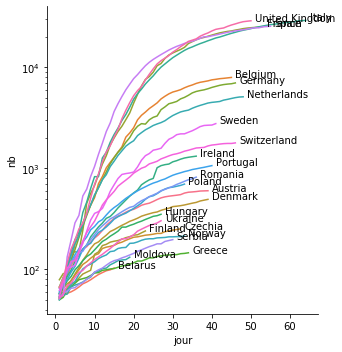

In [16]:
data_deaths_UE = data_deaths[data_deaths["Region"] == "Europe"]
print(data_deaths_UE["Country/Region"].unique())
sync_and_plot(data_deaths_UE,'Country/Region',50,100)

Import des données US

In [17]:
data_deaths_US = pd.read_csv(source_deaths_US)

In [18]:
data_deaths_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,83,84,84,86,86,92,94,95,97,97
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,3,4,4,4,4,4,4,4,4,4


In [19]:
data_deaths_US = import_jhu_data_US(source_deaths_US)
data_deaths_US.head()

,Province/State,Country/Region,Region,Date,nb
0,Alabama,US,North America,2020-01-22,0
1,Alabama,US,North America,2020-01-23,0
2,Alabama,US,North America,2020-01-24,0
3,Alabama,US,North America,2020-01-25,0
4,Alabama,US,North America,2020-01-26,0


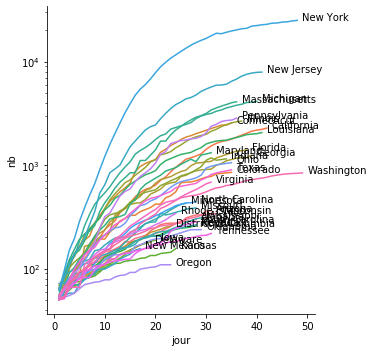

In [20]:
sync_and_plot(data_deaths_US,'Province/State',J0_threshold=50, min_threshold=100)

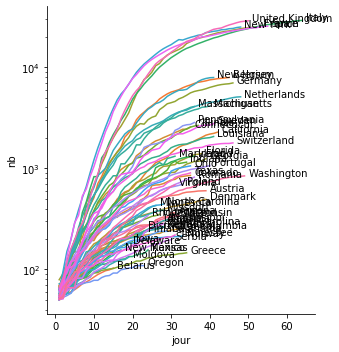

In [21]:
data_deaths_UE_US = pd.concat(
    [data_deaths_UE.rename(columns={"Country/Region" : "State"}).drop(columns=["Province/State"]),
     data_deaths_US.rename(columns={"Province/State" : "State"}).drop(columns=["Country/Region"])])

data_deaths_UE_US.State.unique()

sync_and_plot(data_deaths_UE_US,'State',J0_threshold=50, min_threshold=100)

In [22]:
import datetime

date2 = pd.to_datetime("01/03/2020",format='%d/%m/%Y')

tod = datetime.datetime.now()
tod

demain = datetime.datetime.now() + datetime.timedelta(days=1)
delta = (tod - date2)
delta.days

65

2020-01-22 00:00:00
2020-01-29 00:00:00
2020-02-05 00:00:00
2020-02-12 00:00:00
2020-02-19 00:00:00
2020-02-26 00:00:00
2020-03-04 00:00:00
2020-03-11 00:00:00
2020-03-18 00:00:00
2020-03-25 00:00:00
2020-04-01 00:00:00
2020-04-08 00:00:00
2020-04-15 00:00:00
2020-04-22 00:00:00
2020-04-29 00:00:00


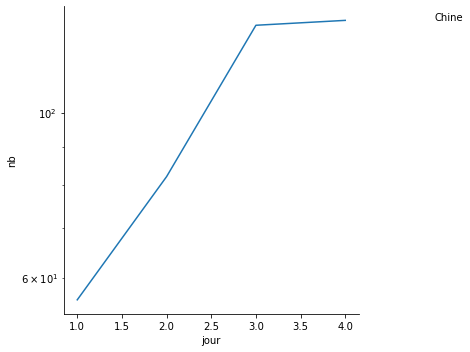

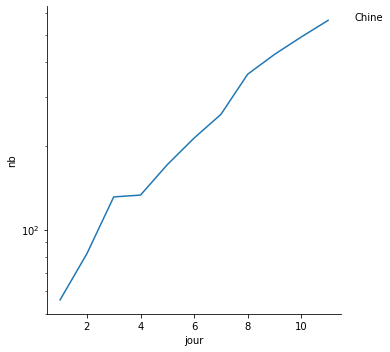

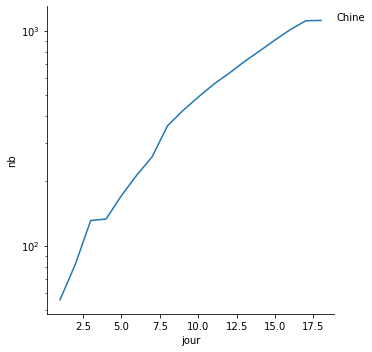

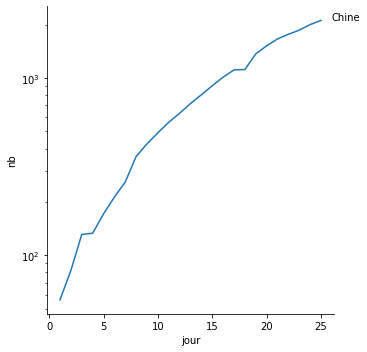

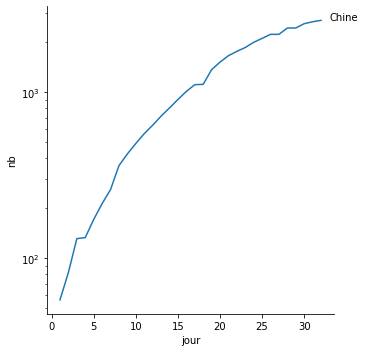

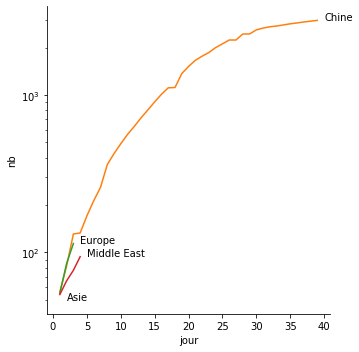

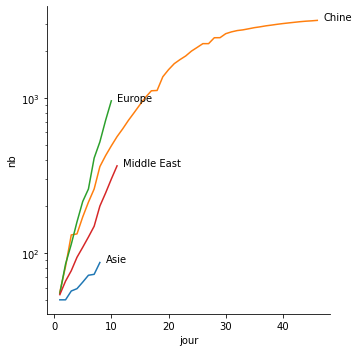

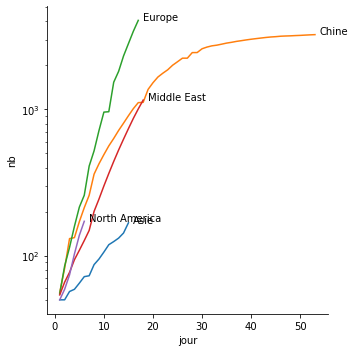

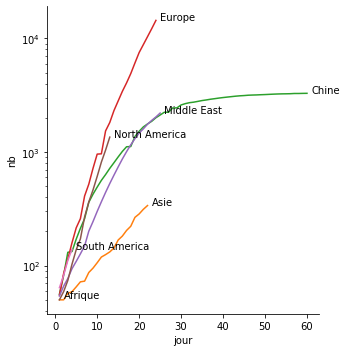

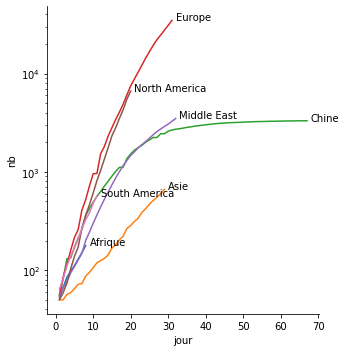

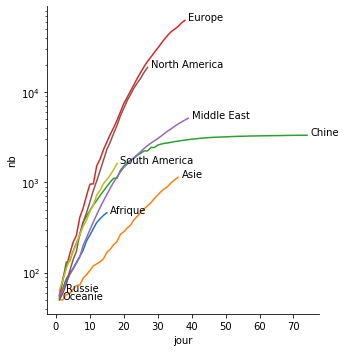

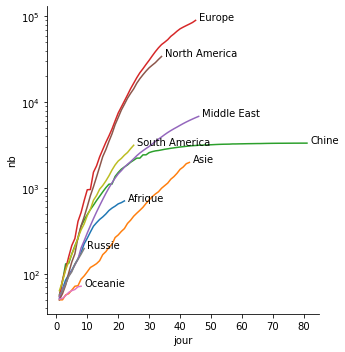

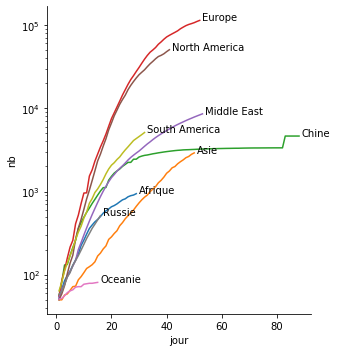

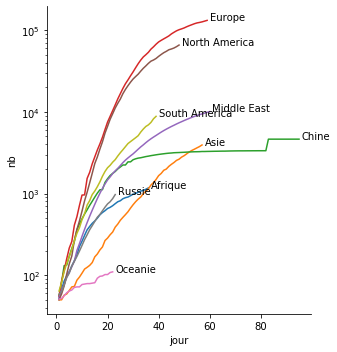

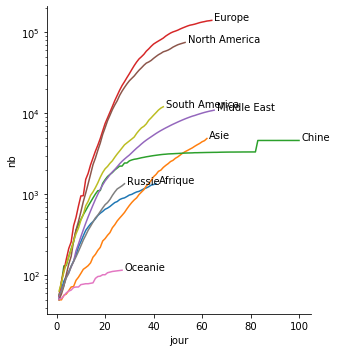

In [23]:
import datetime
end_date = data_deaths_country.Date.max()
start_date = data_deaths_country.Date.min()
delta = datetime.timedelta(days=7)
nb_days = (end_date - start_date).days

cur_date = start_date
while cur_date <= end_date:
    print(cur_date)
    cur_date += delta
    sync_and_plot(data_deaths_region,'Region',50,1, cur_date)
    
    